# Orientation Analysis

## Mesogens with NP | Pressure Ramps

### System P = 1.8, Expected value of $T_c$ : 7.09 

In [26]:
#-----Import packages.

import gsd
import gsd.hoomd
import matplotlib.pyplot as plt
import numpy
import orientation_analysis
import seaborn as sns; 
sns.set_style('whitegrid')

## Visualize one curve

In [27]:
#-----Define variables

temp = 6.2; 
press = 1.8;

In [28]:
#-----Declare the file from wich we'll extract the configuration of the system.

ramp_file = "T_" + str(temp) + "_P_" + str(press) + "_ramp.gsd"

In [29]:
t1 = gsd.hoomd.open(ramp_file, 'rb')

In [30]:
s1 = orientation_analysis.sList(t1)

In [31]:
mean_s = numpy.mean(s1);
std_s = numpy.std(s1);
print("S =", mean_s,"+-",std_s)

S = 0.9005024254382503 +- 0.05113446607018139


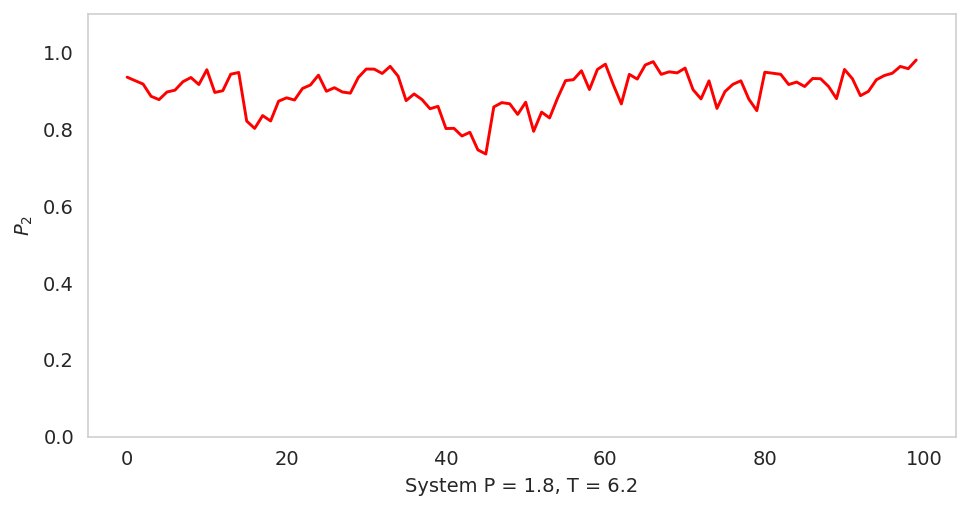

In [32]:
plt.figure(figsize=(8,4), dpi=140);
plt.plot(numpy.arange(len(s1)), s1, 'r');

plt.xlabel('System ' + 'P = ' + str(press) + ', T = ' + str(temp));
plt.ylabel('$P_{2}$');
plt.ylim((0,1.1))
plt.grid()

plt.show()

## Transition Curve

In [33]:
p2 = []
p2_std = []
temperature = []

for i in range(8):
    temp = 6.0 + 0.2*i
    temperature.append(temp)
    press = 1.8
    file = "T_" + str(temp) + "_P_" + str(press) + "_equilibrium.gsd"
    t = gsd.hoomd.open(file, 'rb')
    s = orientation_analysis.sList(t)
    mean_p2 = numpy.mean(s)
    std_p2 = numpy.std(s)
    p2.append(mean_p2)
    p2_std.append(std_p2)

In [34]:
p2 = numpy.array(p2)
p2_std = numpy.array(p2_std)
p2_std = p2_std / numpy.sqrt(100)

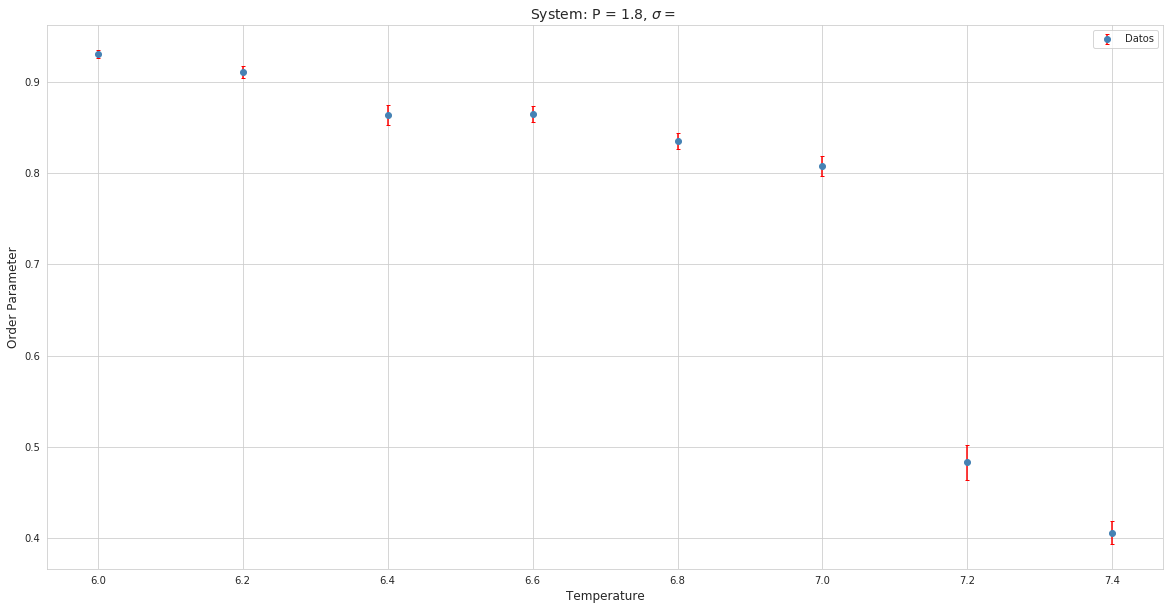

In [35]:
# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting the error bars
ax.errorbar(temperature, p2, yerr=p2_std, label = 'Datos',fmt='o', ecolor='red',
            color='steelblue', capsize=2)

# Adding a Plot
#ax.plot(t, p_2_pure, label='Ajuste', color = 'green');

# Adding plotting parameters
ax.set_title('System: P = 1.8, $\sigma =  $ ', fontsize=14)
ax.set_xlabel('Temperature', fontsize=12);
ax.set_ylabel('Order Parameter', fontsize=12);
ax.legend();
#fig.savefig("sistema_puro.png",dpi = 200, format = "png")